Lab One: Visualization and Data Preprocessing
by Nino Castellano, Aayush Dalal, Chloe Prowse, Muskaan Mahes

1. Business Understanding:
The Student Placement Dataset from Kaggle was collected and analyzed to determine whether students’ results were sufficient to obtain a job offer. The dataset contained over 50,000 records consisting of academic, technical, and soft-skill attributes that can influence the outcome of being placed or not. Therefore, the primary purpose of the dataset is to help students and educational institutions understand which factors are crucial for achieving a successful placement outcome. Using placement results is important, as they can provide real-world examples that can serve as a template for assessing how well a student is prepared for the job market.

The main objective of this analysis is to explore the relationships between students’ key features, and their placement outcome to identify important insights. Therefore, the target variable from the training set, placement status, was used to measure the effectiveness of the student outcome.


In [74]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

#Importing Train Dataset for Intial EDA
df = pd.read_csv("/Users/muskaanmahes/Downloads/placement_train.csv")




2. Data Understanding

2.1 Describing the Meaning and Type of Data for Each Feature:
This dataset contains 14 attributes that describe a student profile. The variable Student_ID is a unique identifier, while Age is a ratio-scale numeric value. The categorical features include Gender, Degree, Branch, and Placement_Status, which are all nominal variables. Additionally, there are academic variables which are all on a ratio-scale: Internships, Projects, Certifications, Backlogs, and CGPA, which is on an interval scale. Skill-related attributes such as Coding_Skills, Communication_Skills, Aptitude_Test_Score, and Soft_Skills_Rating are either on the ordinal or interval scale, ranging from 1 to 10. Therefore, the dataset has numerical, categorical, and ratio features that are crucial for analyzing a student's performance. 


In [75]:
#type of data each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student_ID            45000 non-null  int64  
 1   Age                   45000 non-null  int64  
 2   Gender                45000 non-null  object 
 3   Degree                45000 non-null  object 
 4   Branch                45000 non-null  object 
 5   CGPA                  45000 non-null  float64
 6   Internships           45000 non-null  int64  
 7   Projects              45000 non-null  int64  
 8   Coding_Skills         45000 non-null  int64  
 9   Communication_Skills  45000 non-null  int64  
 10  Aptitude_Test_Score   45000 non-null  int64  
 11  Soft_Skills_Rating    45000 non-null  int64  
 12  Certifications        45000 non-null  int64  
 13  Backlogs              45000 non-null  int64  
 14  Placement_Status      45000 non-null  object 
dtypes: float64(1), int6

2.2 Verifying Data Quality (Missing Values, Duplicate Data, Outliers):


After analyzing the dataset, no missing or duplicated data was identified. All 15 columns were checked for missing values, though it returned an empty DataFrame, hence indicating that there are no incomplete values. Additionally, the dataset contained zero duplicate rows, demonstrating that each student entry is unique. Therefore, the overall data is clean and well-defined. 


In [76]:
#missing values
#to check for any nulls
rows_with_nulls = data[data.isnull().any(axis=1)]
print("Rows with null values: ")
print(rows_with_nulls)

#duplicate data
number_duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {number_duplicates}")



Rows with null values: 
Empty DataFrame
Columns: [Student_ID, Age, Gender, Degree, Branch, CGPA, Internships, Projects, Coding_Skills, Communication_Skills, Aptitude_Test_Score, Soft_Skills_Rating, Certifications, Backlogs, Placement_Status]
Index: []

Number of duplicate rows: 0


However, after calculating the interquartile range (IQR) for each numeric variable, several columns were flagged to have potential outliers. Specifically, there were 153 outliers in CGPA, 1652 in Internships, 1130 in Projects, and 4354 in Soft_Skills_Tating. Additionally, these outliers are not data entry errors as they were found through the IQR method. For example, having a high CGPA, such as 9.80, can indicate a strong academic performance, and having multiple internships or projects is realistic for motivated students. Therefore, the outliers can skew the metrics; we should not remove them. Instead, we could extend the bounds to reduce extreme values. 


In [77]:

# checking for outliers
numeric_column = data.select_dtypes(include = ['float64', 'int64']).columns

for col in numeric_column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    print(f"\nOutliers in '{col}': ")
    print(outlier[[col]])
    print(f"Total outliers in '{col}': {outlier.shape[0]}")






Outliers in 'Student_ID': 
Empty DataFrame
Columns: [Student_ID]
Index: []
Total outliers in 'Student_ID': 0

Outliers in 'Age': 
Empty DataFrame
Columns: [Age]
Index: []
Total outliers in 'Age': 0

Outliers in 'CGPA': 
       CGPA
685    9.80
690    9.74
776    9.80
1055   9.80
1329   9.80
...     ...
44145  9.80
44540  9.80
44750  9.80
44795  9.76
44873  9.80

[153 rows x 1 columns]
Total outliers in 'CGPA': 153

Outliers in 'Internships': 
       Internships
42               3
55               3
155              3
162              3
187              3
...            ...
44888            3
44909            3
44952            3
44972            3
44973            3

[1652 rows x 1 columns]
Total outliers in 'Internships': 1652

Outliers in 'Projects': 
       Projects
87            6
88            6
113           1
119           1
134           6
...         ...
44756         6
44777         6
44873         6
44933         6
44947         6

[1130 rows x 1 columns]
Total outliers in 

The violin and strip plots depict the distribution and their respective outliers within the four numerical features. In the CGPA plot, even though high values like 9.8 are flagged as outliers, they represent high academic performances. The Intership plot ranges from 0 to 3, with value of 3 considered to be outliers, though they can still reflect real-world scenarios. In the Projects plot, the data is mainly concentrated between ranges 2 and 5, while ranges 1 and 6 are flagged as outliers, which may depict lower or higher engagment. Lastly, the Soft_Skills_Ratings ranged from 1 to 10, and have outliers on both ends. Therefore, these outliers are statistically significant and may not be erroneous. 


<function matplotlib.pyplot.show(close=None, block=None)>

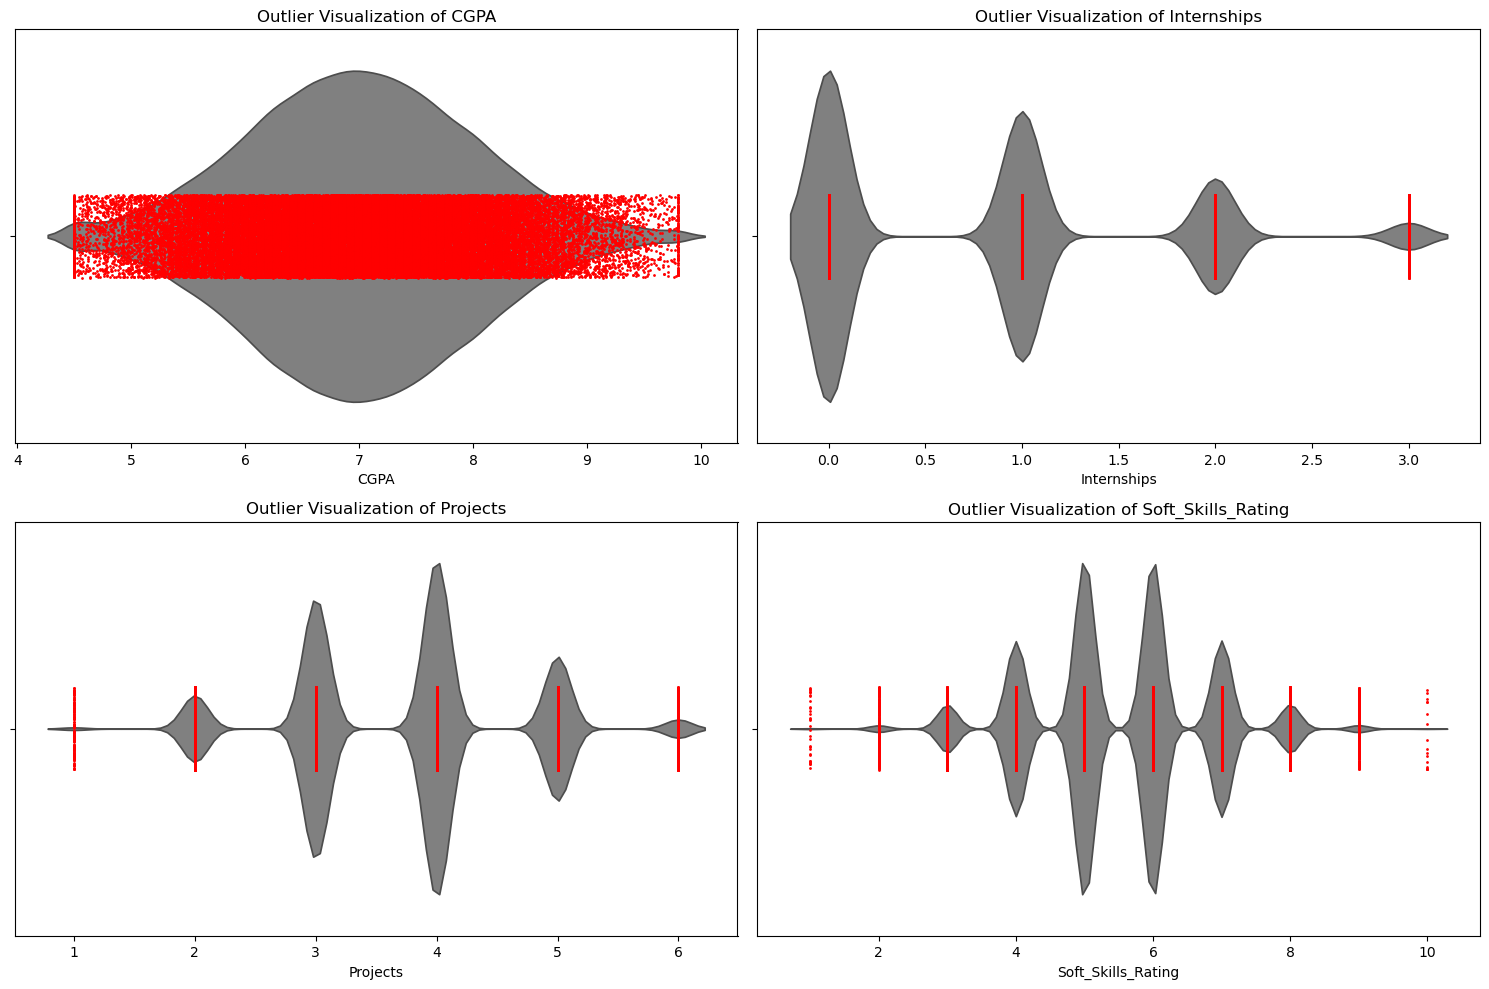

In [78]:
#visualizing outliers
#columns that had outliers
column_outlier = ['CGPA', 'Internships', 'Projects', 'Soft_Skills_Rating']

plt.figure(figsize=(15,10))

#violin and strip plots
for i, col in enumerate(column_outlier, 1):
    plt.subplot(2,2,i)
    sns.violinplot(x=data[col], inner=None, color='gray')
    sns.stripplot(x=data[col], color = 'red', size=2, jitter=True)
    plt.title(f'Outlier Visualization of {col}')

plt.tight_layout()
plt.show

3. Exceptional Work:


To implement dimension reduction, a linear discriminant analysis (LDA) was applied to reduce the feature space to a single linear discriminant (LD1), with the target variable as Placement_Status. LDA is a supervised technique that not only reduces dimensionality but also separates the two outcomes classes. After this transformation, a logistic regression classifier was trained on the data. This resulted in a plot that shows the linear boundary, indicating a good class separation. The logistic regression method was chosen due to its simplicity and effectiveness in binary classification.

In [79]:

#Dimension Reduction: LDA + Logistic Regression
#defining the features and target variable
X = df[['CGPA', 'Internships', 'Projects', 'Soft_Skills_Rating']]
y = df['Placement_Status'].astype('category').cat.codes  # Converts to 0 (Not Placed), 1 (Placed)

# Train/test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Standardize features
scale = StandardScaler()
x_train_std = scale.fit_transform(x_train)
x_test_std = scale.transform(x_test)

#applying LDA and using 1 component because of the outcome
lda = LDA(n_components=1)
x_train_lda = lda.fit_transform(x_train_std, y_train)
x_test_lda = lda.transform(x_test_std)

#training with logistic model
model = LogisticRegression()
model.fit(x_train_lda, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

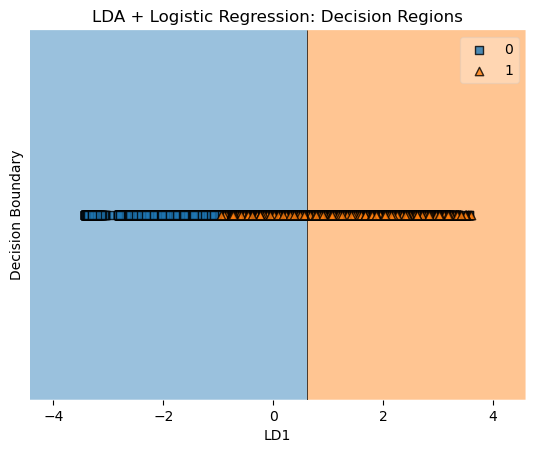

In [80]:
#plot
plot_decision_regions(x_train_lda, y_train.to_numpy().astype(np.int_), clf=model)
plt.xlabel("LD1")
plt.ylabel("Decision Boundary")
plt.title("LDA + Logistic Regression: Decision Regions")
plt.show()
